# Convolutional Neural Network (CNN)

> **We extract featuers from pixels.**
>
> **xTicks and yTicks represent pixels.**
>
> **Data Augmentation**
>
> **Convolutional Operation**
>
> **Filer**
>
> **Stride**
>
> **Padding**
>
> **Max polling**


This file contains the complete practice project of convulutional neural network(CNN). 
- Importig libraries
- Loading datatset
- Splitting dataset
- Displaying the dataset
- Exploring the dataset
- Normalization
- Data Formatting
- Then applying the model
  - Creating the model
  - Compile the model
  - Fit/Train the model
  - evaluate the model
  - Saving the model
- Importing and using the saved/trained model
- Prediction

## Step-I Importing libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 


2023-09-08 19:44:01.585333: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-08 19:44:02.238744: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-08 19:44:02.246798: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-08 19:44:05.146996: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Step-II Loading the dataset

In [2]:
df = keras.datasets.mnist.load_data() # these datasets are already divided into training and testing datasets

## Step-III Splitting into test and train

In [40]:
(X_train, y_train), (X_test, y_test) = df
# x = images
# y = labels

## Step-III Displaying and exploring the data

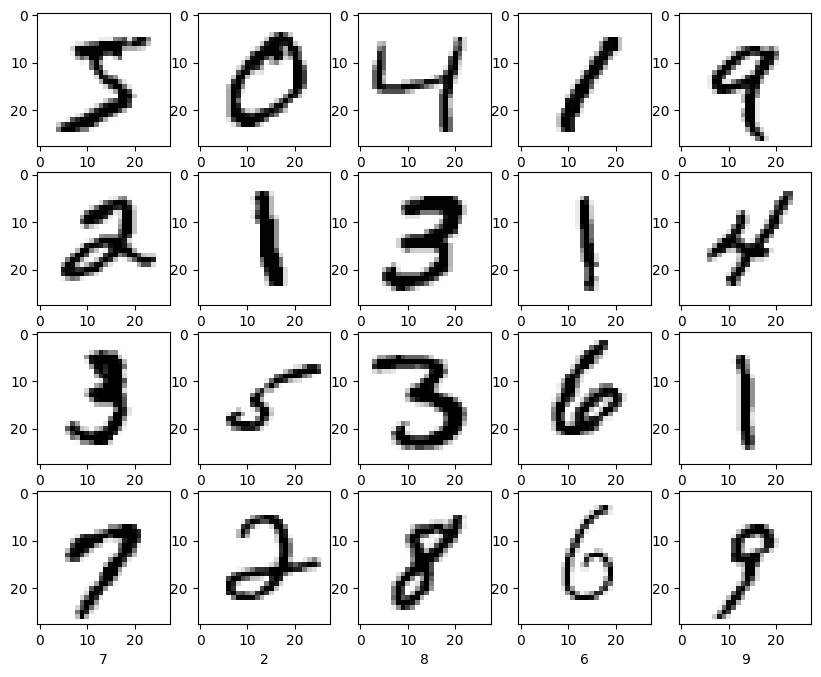

In [17]:
plt.figure(figsize=(10,10)) # creating a figure
for i in range (20): # displaying first 20 images
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary) # white background (cmap)
    plt.xlabel(y_train[i])
    
plt.show()

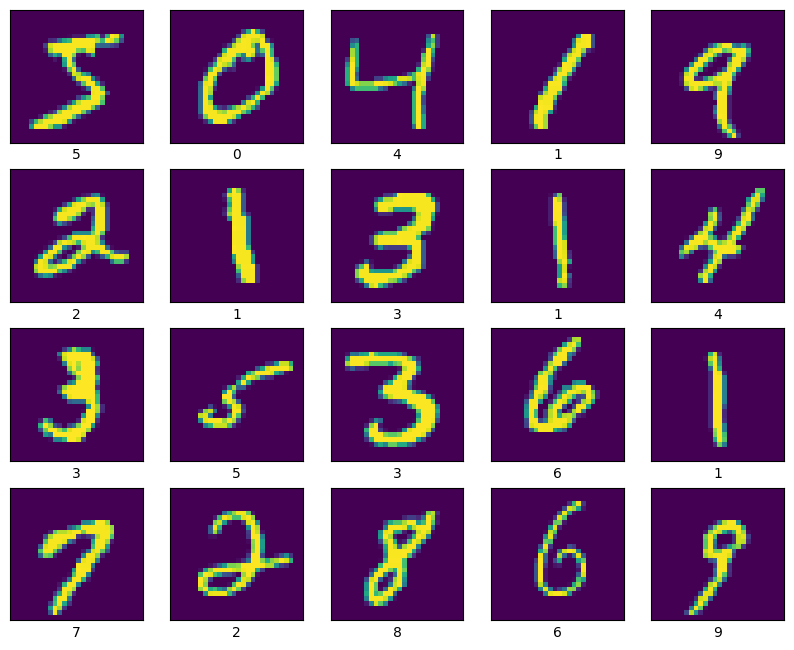

In [18]:
plt.figure(figsize=(10,10))
for i in range (20):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([]) # to remove the ticks
    plt.yticks([]) # to remove the ticks
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
    
plt.show()

### Checking the shape/size of datasets and the size/pixels/shape of images in the dataset

In [20]:
print(f"we have {len(X_train)} images in in training dataset and {len(X_test)} images in testing dataset" )
print("the size of an image is ", X_train[0].shape)

we have60000 images in in training dataset and 10000 images in testing dataset
the size of an image is  (28, 28)


In [22]:
X_train.shape, X_test.shape # 60000 images of 28 by 28 pixels 

((60000, 28, 28), (10000, 28, 28))

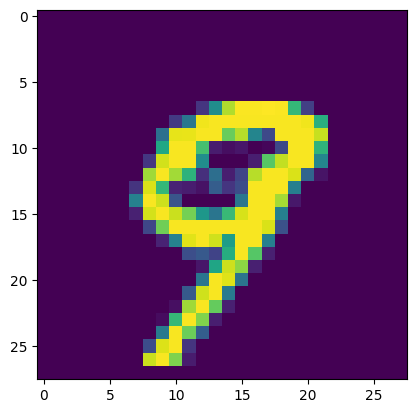

In [23]:
plt.imshow(X_train[87])

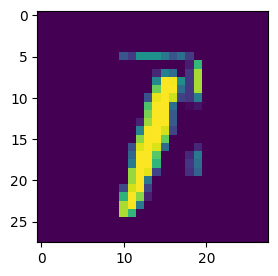

In [32]:
plt.figure(figsize=(3,3))
plt.imshow(X_train[67])


### Displaying the image in gray scale

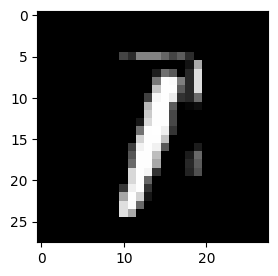

In [33]:
plt.figure(figsize=(3,3))
plt.imshow(X_train[67],cmap="gray")


### Displaying the image in gray scale with no axis show

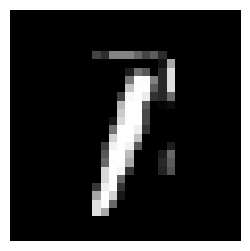

In [34]:
plt.figure(figsize=(3,3))
plt.axis("off")
plt.imshow(X_train[67],cmap="gray")


### Displaying the random images

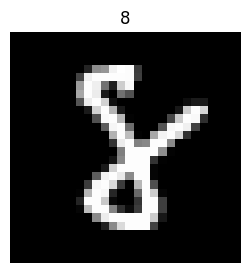

In [10]:
import random
ran_img = random.randint(0,len(X_train))

plt.figure(figsize=(3,3))
plt.imshow(X_train[ran_img], cmap="gray")

plt.title(y_train[ran_img])
plt.axis(False);

In [19]:
X_train.shape, X_test.shape # gives the shape of dataset and the images as well

((60000, 28, 28), (10000, 28, 28))

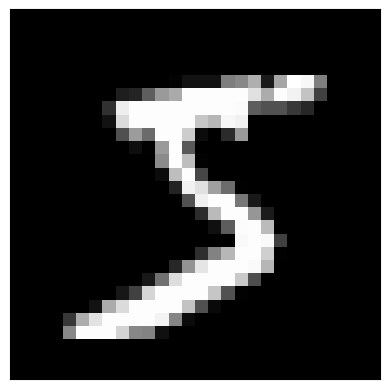

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 18 18 18 126 136 175 26 166 255 247 127 0 0 0 0 0 0 0 0 0 0 0 0 30 36 94 154 170 253 253 253 253 253 225 172 253 242 195 64 0 0 0 0 0 0 0 0 0 0 0 49 238 253 253 253 253 253 253 253 253 251 93 82 82 56 39 0 0 0 0 0 0 0 0 0 0 0 0 18 219 253 253 253 253 253 198 182 247 241 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 80 156 107 253 253 205 11 0 43 154 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 14 1 154 253 90 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 139 253 190 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 11 190 253 70 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 35 241 225 160 108 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 81 240 253 253 119 25 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [24]:
# displaying the image 
plt.imshow(X_train[0], cmap="gray")
plt.xticks([]) # to remove the ticks
plt.yticks([]) # to remove the ticks
plt.grid(False)
plt.show()

# displaying the values of each pixel
for row in X_train[0]:
    for pixel in row:
        print(pixel, end=" ")

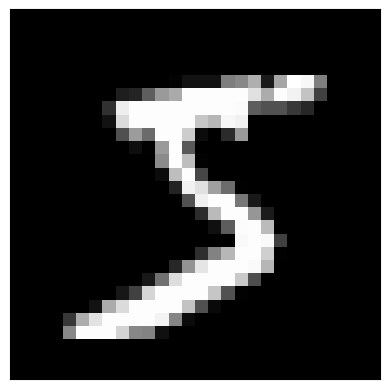

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [34]:
# displaying the image 
plt.imshow(X_train[0], cmap="gray")
plt.xticks([]) # to remove the ticks
plt.yticks([]) # to remove the ticks
plt.grid(False)
plt.show()

# displaying the values of each pixel
for row in X_train[0]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")  # need to explain
    print() #

## Reshaping the data to get third value. color's value

In [41]:
X_train = X_train.reshape(X_train.shape+(1,))
X_test = X_test.reshape(X_test.shape+(1,))

In [42]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Normalizing the dataset

In [43]:
X_train = X_train/255
X_test = X_test / 255
# data range from 0 to 255. we are dividing each value with maximum value so that i ranges from 0 to 1

In [45]:
# from 0 to 1 range, the values will be in float. so we will change the data types from int to float
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

## Combining the whole code

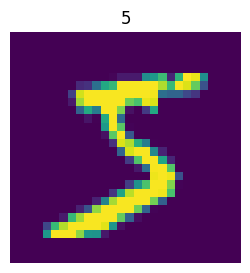

0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.012 0.071 0.071 0.071 0.494 0.533 0.686 0.102 0.651 1.000 0.969 0.498 0.000 0.000

In [60]:
# importing the libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# importing the dataset and splitting it
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# displaying the first image in the dataset
plt.figure(figsize=(3,3))
plt.imshow(X_train[0])
plt.axis(False)
plt.title(y_train[0])
plt.xticks([])
plt.yticks([])
plt.show()

'''
# displaying the value of each pixel before normalization
for row in X_train[0]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()
'''    
# Normalizing the values to range form 0 to 1 and changing its datatype from int0 to float
X_train = X_train.astype("float32") / 255.0
y_test = y_test.astype("float32") / 255.0

# displaying the value of each pixel after normalization
for row in X_train[0]:
    for pixel in row:
        print("{:0.3f}".format(pixel), end=" ")
    print()

# Reshape the image to have the channel dimension
X_train = X_train.reshape(X_train.shape+(1,))
X_test = X_test.reshape(X_test.shape+(1,))

# Display the output of complete cell
# display(plt.gcf())
# display(plt.gca())

## Building the model

In [68]:
# Importing the libraries
from tensorflow import keras
from keras import layers

# Create a Model
model = keras.Sequential([
    layers.Input(shape=(28,28,1)), # inpurt layer, 28,28 pixel picture with i color channel(gray)
    layers.Conv2D(filters=10, kernel_size=(3,3), activation="relu"), # 1st convolutional layer, convulutional operation carried out
    # filter is the number of filters we want to apply
    # kernal size the size of matrics of filter
    layers.Conv2D(filters=10, kernel_size = (3,3), activation="relu"), # 2nd convolutional layer
    layers.MaxPool2D(), # pooling layer
    layers.Conv2D(filters=10, kernel_size = (3,3), activation="relu"),
    layers.MaxPool2D(), # create a matrix and pickup the maximum value or avaerage value from it
    layers.Flatten(), # make the metrices into a vector/an array
    layers.Dense(10, activation="softmax") # output layer, 10 is the number of neurons
     
])

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 10)        0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 10)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 250)               0

In [72]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer="adam",
    metrics=["accuracy"]
)

In [73]:
# training and testing the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

2023-09-08 22:27:09.666502: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


Epoch 1/5
750/750 [==============================] - 22s 28ms/step - loss: 0.3409 - accuracy: 0.8956 - val_loss: 0.1214 - val_accuracy: 0.9647
Epoch 2/5
750/750 [==============================] - 21s 28ms/step - loss: 0.1122 - accuracy: 0.9654 - val_loss: 0.0946 - val_accuracy: 0.9719
Epoch 3/5
750/750 [==============================] - 27s 35ms/step - loss: 0.0865 - accuracy: 0.9734 - val_loss: 0.0801 - val_accuracy: 0.9756
Epoch 4/5
750/750 [==============================] - 19s 25ms/step - loss: 0.0706 - accuracy: 0.9779 - val_loss: 0.0799 - val_accuracy: 0.9766
Epoch 5/5
750/750 [==============================] - 18s 24ms/step - loss: 0.0618 - accuracy: 0.9804 - val_loss: 0.0631 - val_accuracy: 0.9814


In [74]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test loss is: ", test_loss)
print("Test accuracy is: ", test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 3862.1941 - accuracy: 0.0976
Test loss is:  3862.194091796875
Test accuracy is:  0.09759999811649323


In [75]:
# Saving the model
model.save("pehlacnn.h5")

/home/ahsan/miniconda3/envs/deep_ka_env/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Using the trained Model

In [77]:
img = X_test[7]
print(img.shape)


(28, 28, 1)


In [78]:
# adding image to a batch where its the only member
img = np.expand_dims(img,0)
img.shape

(1, 28, 28, 1)

In [81]:
# Predictin the value
pred = model.predict(img)
pred

1/1 [==============================] - 0s 130ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)